<a href="https://colab.research.google.com/github/tarboledah/SyS/blob/main/ejercicio_de_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Señal Cuasiperiódica###

#Función#
$x(t) = 8\cos(100t) + 10\sin(20t) - 7\cos\left(300t - \frac{\pi}{7}\right)$


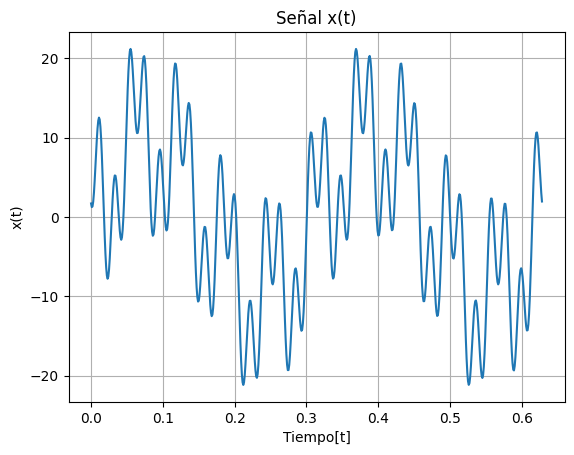

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

t= np.arange(0,2*np.pi/10,0.001)

#Funcion 1
a=8*np.cos(100*t)

#Funcion 2

b=10*np.sin(20*t)

#Funcion 3

c=-7*np.cos(300*t-np.pi/7)


x= a+b+c

plt.plot(t,x)
plt.xlabel("Tiempo[t]")
plt.ylabel("x(t)")
plt.title("Señal x(t)")
plt.grid(True)
plt.show()






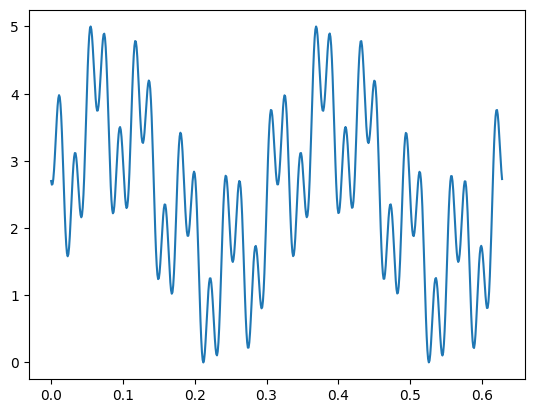

In [29]:
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

y2=my_ceropen(x,0,5)
plt.plot(t,y2)

In [38]:
y2.shape[0]

629

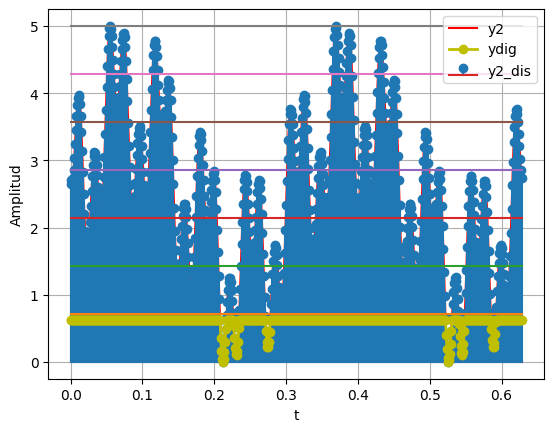

In [45]:
nbits = 3  # Número de bits para la discretización
rmin = 0  # Valor mínimo de la cuantización
rmax = 5  # Valor máximo de la cuantización
ve = np.linspace(rmin, rmax, 2**nbits)  # Vector de cuantización

d = cdist(y2.reshape(-1, 1), ve.reshape(-1, 1))
ind = np.argmin(d,axis=1)



def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

for i in range(y2.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y2[i],t)
   else:
     yq = np.append(yq,my_cuantizador(y2[i],t)) #apilar datos cuantizando si i>0

plt.plot(t,y2,c='r', label='y2')#cs continua

plt.stem(t,y2, label='y2_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(t,v*np.ones(len(t)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()